# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.preprocessing import StandardScaler


In [2]:
# libraries for the model building

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [3]:
# loading the diabetes dataset to pandas dataframe

df = pd.read_csv("/content/diabetes.csv")

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.shape

(768, 9)

In [6]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

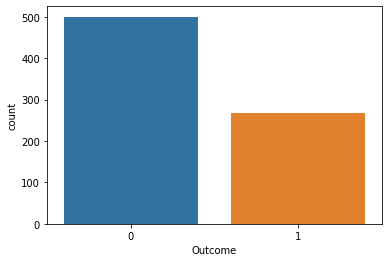

In [7]:

# plotting the target column

sns.countplot(x="Outcome",data=df)

In [8]:
# seperating the data and the labels

x = df.drop(columns="Outcome",axis=1)

y = df["Outcome"]

In [9]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:

# splitting the dataset in train test and split

x_train, x_test, y_train, y_test = train_test_split(
                                                    x,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42
                                                    ) 

In [12]:
print(x_train.shape)
print(x_test.shape)
print("* "*10 )
print(y_train.shape)
print(y_test.shape)

(614, 8)
(154, 8)
* * * * * * * * * * 
(614,)
(154,)


In [13]:
# scaling is required in the case of ann model so as to reduce the domination of bigger values on smaller values

# salary vs age

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

In [14]:
# sequential model are linearly stacked layers on the model 

# if you wish to change the activation fn or number of nerons you can do that

#

model = Sequential()

model.add(Dense(20,activation="relu",input_dim=8))
model.add(Dropout(0.2))
model.add(Dense(15,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                180       
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 10)                160       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 666
Trainable params: 666
Non-trainable params: 0
_________________________________________________________________


In [16]:
#model.layers[0].get_weights()

In [17]:
model.compile(
              loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"]
)

In [18]:
# here we have fitted the model with train data

# we have trained the model for many number of epochs

# with the validation split of 0.2 that means 20 percent of the train data is reserved for the validation purpose


history = model.fit(
                    x_train_scaled,
                    y_train,
                    verbose=True,
                    batch_size=32,
                    validation_split=0.2,
                    epochs=100
)

Epoch 1/100
16/16 [==============================] - 3s 16ms/step - loss: 0.6829 - accuracy: 0.5316 - val_loss: 0.6535 - val_accuracy: 0.6016
Epoch 2/100
16/16 [==============================] - 0s 4ms/step - loss: 0.6526 - accuracy: 0.6090 - val_loss: 0.6253 - val_accuracy: 0.6423
Epoch 3/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6265 - accuracy: 0.6701 - val_loss: 0.5989 - val_accuracy: 0.7154
Epoch 4/100
16/16 [==============================] - 0s 5ms/step - loss: 0.6053 - accuracy: 0.7067 - val_loss: 0.5724 - val_accuracy: 0.7317
Epoch 5/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5826 - accuracy: 0.7108 - val_loss: 0.5496 - val_accuracy: 0.7398
Epoch 6/100
16/16 [==============================] - 0s 5ms/step - loss: 0.5777 - accuracy: 0.7271 - val_loss: 0.5303 - val_accuracy: 0.7805
Epoch 7/100
16/16 [==============================] - 0s 4ms/step - loss: 0.5463 - accuracy: 0.7251 - val_loss: 0.5150 - val_accuracy: 0.7724
Epoch 8/100


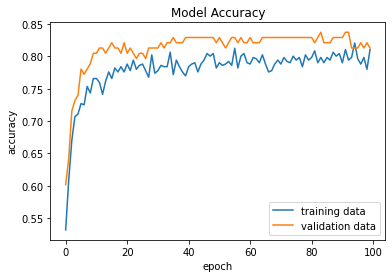

In [19]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

plt.title("Model Accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training data","validation data"],loc="lower right")

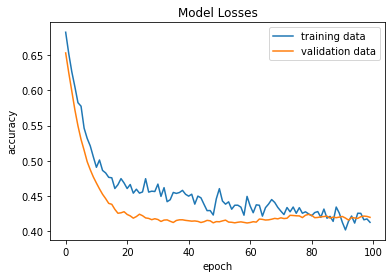

In [23]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title("Model Losses")
plt.ylabel("accuracy")
plt.xlabel("epoch")

plt.legend(["training data","validation data"],loc="upper right")

In [24]:
#  Testing part

y_log = model.predict(x_test_scaled)

y_log[:2]

5/5 [==============================] - 0s 2ms/step


array([[0.7743577 ],
       [0.28538588]], dtype=float32)

In [25]:
y_pred = np.where(y_log>0.5,1,0)


In [26]:
y_pred[:2]

array([[1],
       [0]])

In [27]:
# checking the accuracy of the model

acc = accuracy_score(y_test,y_pred)

print("Accuracy Score : ",acc)

Accuracy Score :  0.7467532467532467


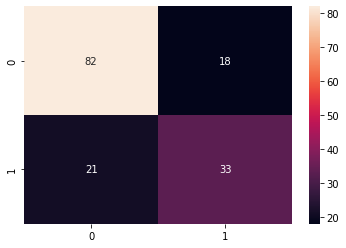

In [28]:
# print the confussion matrix 

cnf = confusion_matrix(y_test,y_pred)

sns.heatmap(cnf,annot=True)

In [29]:
input_data = (4,144,58,28,140,29.5,0.287,37)

# taking the input in tha array form
input_data = np.asarray(input_data)

input_data_reshape = input_data.reshape(1,-1)

x_test_scaling = scaler.transform(input_data_reshape)

prediction = model.predict(x_test_scaling)

y_pred = np.where(prediction>0.5,1,0)

if y_pred[0][0] == 0:
  print("Person is not suffering from diabetes")
else:
  print("Person is suffering from diabetes")

1/1 [==============================] - 0s 17ms/step
Person is suffering from diabetes


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [30]:
import pickle

In [31]:
filename = "trained_model.sav"
pickle.dump(model,open(filename,"wb"))

In [32]:
filename_sc = "scaler.pkl"
pickle.dump(scaler,open(filename_sc,"wb"))

In [33]:
# loading the model files

loaded_model = pickle.load(open("trained_model.sav","rb"))

In [34]:
# loadinig the model scaling object

loaded_scaler = pickle.load(open("scaler.pkl","rb"))


In [35]:
# testing out the records on the loaded model object and the scaler object

input_data = (4,144,58,28,140,29.5,0.287,37)

# taking the input in tha array form
input_data = np.asarray(input_data)

input_data_reshape = input_data.reshape(1,-1)

x_test_scaling = loaded_scaler.transform(input_data_reshape)

prediction = loaded_model.predict(x_test_scaling)

y_pred = np.where(prediction>0.5,1,0)

if y_pred[0][0] == 0:
  print("-"*50)
  print("Person is not suffering from diabetes")
  print("-"*50)
else:
  print("-"*50)
  print("Person is suffering from diabetes")
  print("-"*50)

1/1 [==============================] - 0s 47ms/step
--------------------------------------------------
Person is suffering from diabetes
--------------------------------------------------


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
!pip install keras
!pip install ann_visualizer
!pip install graphviz

In [37]:
from ann_visualizer.visualize import ann_viz

ann_viz(model)

In [38]:
df.columns.tolist()

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [39]:
!pip install -q streamlit

     |████████████████████████████████| 9.2 MB 5.0 MB/s 
     |████████████████████████████████| 237 kB 58.1 MB/s 
     |████████████████████████████████| 4.7 MB 72.7 MB/s 
     |████████████████████████████████| 182 kB 78.3 MB/s 
     |████████████████████████████████| 164 kB 75.7 MB/s 
     |████████████████████████████████| 78 kB 7.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 51 kB 6.7 MB/s 


In [40]:
%%writefile app.py

import numpy as np
import pandas as pd
import streamlit as st
import pickle


# loading the model files
loaded_model = pickle.load(open("trained_model.sav","rb"))

# loadinig the model scaling object
loaded_scaler = pickle.load(open("scaler.pkl","rb"))

def diabetes_prediction(input_data):
  # taking the input in tha array form
  input_data = np.asarray(input_data)

  input_data_reshape = input_data.reshape(1,-1)

  x_test_scaling = loaded_scaler.transform(input_data_reshape)

  prediction = loaded_model.predict(x_test_scaling)

  y_pred = np.where(prediction>0.5,1,0)

  if y_pred[0][0] == 0:
    print("Person is not suffering from diabetes")
  else:
    print("Person is suffering from diabetes")


def main():

  # giving an title to the web page
  st.title("Diabetes Prediction Web Application")

  Pregnancies = st.text_input("Number of Pregnancies")
  Glucose = st.text_input("Glucose Level")
  BloodPressure =  st.text_input("BloodPressure Level")
  SkinThickness =  st.text_input("SkinThickness Value")
  Insulin =  st.text_input("Insulin Level")
  BMI =  st.text_input("BMI Value")
  DiabetesPedigreeFunction =  st.text_input("DiabetesPedigreeFunction Value")
  Age =  st.text_input("Age")
 
  diagnosis = ""

  if st.button("Diabetes Test Result"):
    diagnosis = diabetes_prediction([Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age])

  st.success(diagnosis)



if __name__=="__main__":
  main()


Writing app.py


In [ ]:
pip install pyngrok

In [ ]:
pip install protobuf==3.20.*


In [ ]:

#docker run -it python:3.10 /bin/bash
# Within the Docker container:
!pip3 install google-cloud-logging==3.1.1 protobuf==4.21.0
!python3 -c "import google.cloud.logging"

In [44]:
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python

In [ ]:
pip install --upgrade "protobuf<=3.20.1"

In [ ]:
!pip install 'protobuf<=3.20.1' --force-reinstall

In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] / fetchMetadata: sill resolveWithNewModule ms@2.1.2 checki


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://35.229.101.72:8501

npx: installed 22 in 2.796s
your url is: https://quick-rabbits-dress-35-229-101-72.loca.lt
